### The elbow method is used to determine the optimal number of clusters by plotting the value for K (x axis) versus the distortions (y axis)

Distortions: for each K, calculating the sum of squared distances from each point to its assigned centeroid

As K increases, the centroids are closer to the cluter centroids. But after a point, the improvements decline, hence the elbow shape.

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [3]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

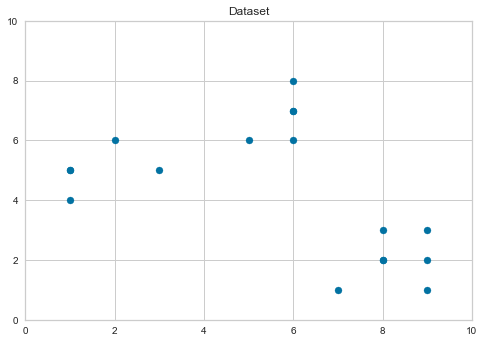

In [11]:
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()


In [5]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

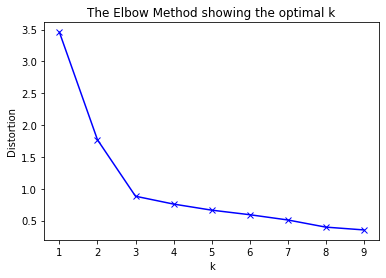

In [6]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Waddle dataaa

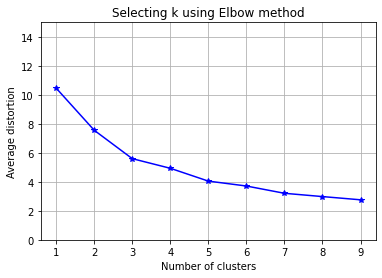

In [7]:
data = pd.read_csv('../../data/cleanData/oneEncodedDiscord.csv')

f1 = data['personal_qualities'].values
f2 = data['friend_qualities'].values
X = np.array(list(zip(f1,f2)))
K_range = range(1,10)

distortions = []
for i in K_range:
    kmeanModel = KMeans(n_clusters = i)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

fig1 = plt.figure()
ex = fig1.add_subplot(111)
ex.plot(K_range, distortions, 'b*-')

plt.grid(True)
plt.ylim([0,15])
plt.xlabel('Number of clusters')
plt.ylabel('Average distortion')
plt.title('Selecting k using Elbow method')
plt.show()

## KElbowVisualizer

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

In [9]:
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

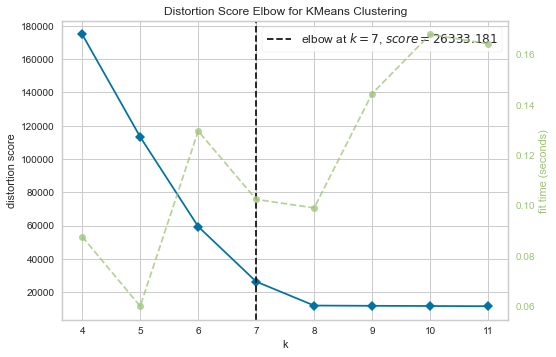

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure